# Notebook Import

In [2]:
from os import walk
from os.path import join

import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd

%matplotlib inline

# Constants

In [92]:
path_root = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/01_Processing/'

EXAMPLE_FILE = path_root + 'practice_email.txt'

SPAM_1_PATH = path_root + 'spam_assassin_corpus/spam_1'
SPAM_2_PATH = path_root +'spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = path_root +'spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = path_root +'spam_assassin_corpus/easy_ham_2'

Data_Json_File = path_root +'email_text_data.json'

SPAM_CAT = 1
HAM_CAT = 0

# Reading Files

In [93]:
stream = open(EXAMPLE_FILE, encoding = 'latin-1')
message = stream.read()
stream.close()

In [94]:
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [95]:
print(type(message))

<class 'str'>


In [96]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [97]:
stream = open(EXAMPLE_FILE,encoding='latin-1')
is_body = False
lines = []
for line in stream:
    if is_body is True :
        lines.append(line)
    elif line == '\n':
        is_body= True
stream.close()
email_body ='\n'.join(lines)
print(email_body)
# print(lines)




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [98]:
def generator_squares(n):
    for my_number in range(n):
        yield my_number **2
    

In [99]:
for i in generator_squares(5):
    print(i,end = ' -> ')

0 -> 1 -> 4 -> 9 -> 16 -> 

## Email body extraction 

In [100]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root,file_name)
                    
            stream = open(filepath,encoding='latin-1')
            is_body = False
            
            lines = []
            
            for line in stream:
                
                if is_body is True :
                    
                    lines.append(line)
                    
                elif line == '\n':
                    
                    is_body= True
                    
            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name,email_body

In [101]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'CATEGORY': classification,'MESSAGE': email_body})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [102]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails.head()

,CATEGORY,MESSAGE
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [103]:
spam_emails.shape

(1898, 2)

In [104]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

ham_emails.shape

(3901, 2)

In [105]:
data = pd.concat([spam_emails,ham_emails])
print('shape of entire dataFrame is ', data.shape)

shape of entire dataFrame is  (5799, 2)


In [106]:
data.head()

,CATEGORY,MESSAGE
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [107]:
data.tail()

,CATEGORY,MESSAGE
01396.61983fbe6ec43f55fd44e30fce24ffa6,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,0,"> >-- be careful when using this one.) Also, t..."
01398.169b51731fe569f42169ae8f948ec676,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ..."
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co..."
01400.f897f0931e461e7b2e964d28e927c35e,0,"Hi there,\n\n\n\nNow this is probably of no us..."


# Data Cleaing : Checking for Missing values

In [108]:
# Check if any message bodies are null
data['MESSAGE'].isnull().values.any()

False

In [109]:
type("")

str

In [110]:
len("")

0

In [111]:
my_var = None
type(my_var)

NoneType

In [112]:
# Check if there are empty emails(string length zero)
(data.MESSAGE.str.len()==0).any()

True

In [113]:
(data.MESSAGE.str.len()==0).sum()

3

In [114]:
# challenge : how would you check the number of entries with null/none values 

data.MESSAGE.isnull().sum()

0

## Locate emails 

In [115]:
type(data.MESSAGE.str.len()==0)

pandas.core.series.Series

In [116]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [117]:
# data.index.get_loc('.DS_store')

In [118]:
# data[4608:4611]

# Remove system file entries from dataframe

In [119]:
data.drop(['cmds'],inplace=True)

In [120]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [121]:
document_ids = range(0,len(data.index))
data['Doc_ID'] = document_ids


data['File_Name'] = data.index
data.set_index('Doc_ID', inplace=True)

In [122]:
data.head()

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [123]:
data.tail()

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
5791,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676
5794,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,0,"Hi there,\n\n\n\nNow this is probably of no us...",01400.f897f0931e461e7b2e964d28e927c35e


# Saving a JSON file with pandas

In [124]:
data.to_json(Data_Json_File) 

# Number of spam messages visualised (pie charts)

In [125]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [126]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

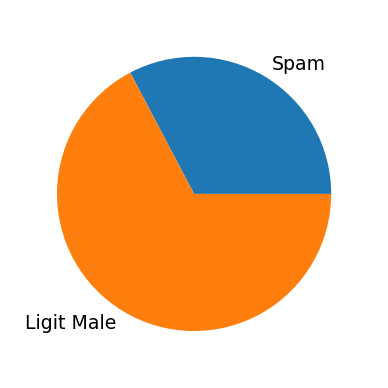

In [127]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6})

plt.show()

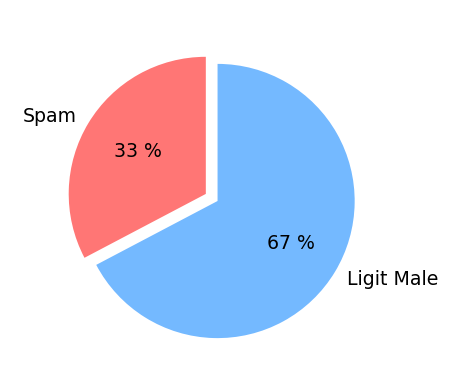

In [128]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]
custom_color = ['#ff7675','#74b9ff']

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        explode=[0,0.1])

plt.show()

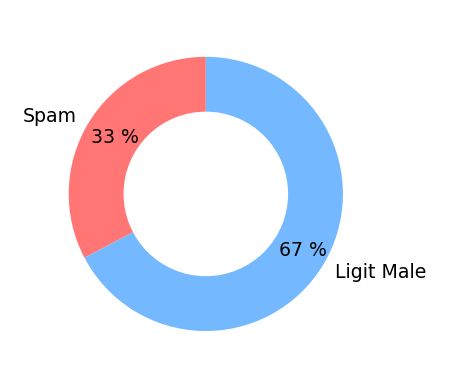

In [129]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]
custom_color = ['#ff7675','#74b9ff']

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        pctdistance=0.8)

# Draw Circle
center_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(center_circle)

plt.show()

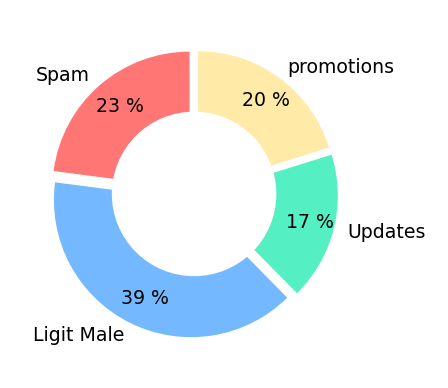

In [130]:
Category_name = ['Spam','Ligit Male','Updates','promotions']
size = [25,43,19,22]
custom_color = ['#ff7675','#74b9ff','#55efc4','#ffeaa7']
offset = [0.05,0.05,0.05,0.05]

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        pctdistance=0.8,explode=offset)

# Draw Circle
center_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(center_circle)

plt.show()

# Natural language processing

## Text pre-processing

In [131]:
# Convert to lower case 
msg = 'All Work an no play mask tack a dull Boy'
msg.lower()

'all work an no play mask tack a dull boy'

## Download the NLTR Resources(Tokenizor and stop words)

In [132]:
nltk.download('punkt')
#C:\Users\97798\AppData\Roaming\nltk_data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\97798\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
nltk.download('stopwords')
# C:\Users\97798\AppData\Roaming\nltk_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenising

In [134]:
msg = 'All Work an no play mask tack a dull Boy'
word_tokenize(msg.lower()) # qord tokenize help to store the sentences in comma and seperate 

['all', 'work', 'an', 'no', 'play', 'mask', 'tack', 'a', 'dull', 'boy']

## Removing stop words 

In [135]:
stop_words = set(stopwords.words('english'))

In [136]:
type(stop_words)

set

In [137]:
text = input('Enter alpha:')
if text in stop_words :
    print('Found It')
else:
    print(text + ' Not found')

Enter alpha:
 Not found


In [138]:
msg = 'All Work an no play mask jack a dull Boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []

# challenge - append non stop word to filtered_words

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
print(filtered_words)

['work', 'play', 'mask', 'jack', 'dull', 'boy', '.', '.']


## word strmming and stems 


In [139]:
msg = 'All Work an no play makes jack a dull Boy. To be or not to be. \
Nobody expect the spanish inqulsition'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english') # this stemmer helps to remove the s, ing, es and es and many more

filtered_words = []

# challenge - append non stop word to filtered_words

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inqulsit']


# Removing Punctuation

In [140]:
'p'.isalpha() # this help to remove the punctuatuon word

True

In [141]:
'??'.isalpha()

False

In [142]:
msg = 'All Work an no play makes jack a dull Boy. To be or not to be.??? \
Nobody expect the spanish inqulsition'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english') # this stemmer helps to remove the s, ing, es and es and many more

filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inqulsit']
